In [1094]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score as r2


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
#%matplotlib inline

from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

In [1095]:
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})
plt.style.use('ggplot')

In [1096]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    """
    # дописать документация
    """
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Valid R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))

    plt.figure(figsize=(18,10))
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

In [1097]:
TRAIN_DATASET_PATH = './data/project_task/train.csv' # y_train, y_valid
TEST_DATASET_PATH = './data/project_task/test.csv'

Загрузка данных
Описание датасета

1. Id - идентификационный номер квартиры
2. DistrictId - идентификационный номер района
3. Rooms - количество комнат
4. Square - площадь
5. LifeSquare - жилая площадь
6. KitchenSquare - площадь кухни
7. Floor - этаж
8. HouseFloor - количество этажей в доме
9. HouseYear - год постройки дома
10. Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
11. Social_1, Social_2, Social_3 - социальные показатели местности
12. Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
13. Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
14. Price - цена квартиры

In [1098]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000,10000.000,10000.000,10000.000,7887.000,10000.000,10000.000,10000.000,1.000e+04,10000.000,10000.000,10000.000,10000.000,5202.000,10000.000,10000.000,10000.000
mean,8383.408,50.401,1.891,56.316,37.200,6.273,8.527,12.609,3.990e+03,0.119,24.687,5352.157,8.039,1142.904,1.319,4.231,214138.857
std,4859.019,43.588,0.840,21.059,86.241,28.561,5.241,6.776,2.005e+05,0.119,17.533,4006.800,23.832,1021.517,1.494,4.806,92872.294
min,0.000,0.000,0.000,1.137,0.371,0.000,1.000,0.000,1.910e+03,0.000,0.000,168.000,0.000,0.000,0.000,0.000,59174.778
25%,4169.500,20.000,1.000,41.775,22.770,1.000,4.000,9.000,1.974e+03,0.018,6.000,1564.000,0.000,350.000,0.000,1.000,153872.634
50%,8394.500,36.000,2.000,52.513,32.781,6.000,7.000,13.000,1.977e+03,0.075,25.000,5285.000,2.000,900.000,1.000,3.000,192269.645
75%,12592.500,75.000,2.000,65.901,45.129,9.000,12.000,17.000,2.001e+03,0.196,36.000,7227.000,5.000,1548.000,2.000,6.000,249135.462
max,16798.000,209.000,19.000,641.065,7480.592,2014.000,42.000,117.000,2.005e+07,0.522,74.000,19083.000,141.000,4849.000,6.000,23.000,633233.467


In [1099]:
train_df.shape[1]-1 == test_df.shape[1]

True

In [1100]:
test_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000,5000.000,5000.000,5000.000,3959.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,2623.000,5000.000,5000.000
mean,8412.595,51.279,1.910,56.450,36.159,5.977,8.632,12.601,1984.393,0.120,24.934,5406.900,8.263,1146.657,1.319,4.243
std,4832.674,44.179,0.839,19.093,17.825,9.950,5.483,6.789,18.573,0.120,17.532,4026.615,23.864,1044.744,1.480,4.777
min,1.000,0.000,0.000,1.379,0.333,0.000,1.000,0.000,1908.000,0.000,0.000,168.000,0.000,0.000,0.000,0.000
25%,4221.750,21.000,1.000,41.906,23.092,1.000,4.000,9.000,1973.000,0.020,6.000,1564.000,0.000,325.000,0.000,1.000
50%,8320.500,37.000,2.000,52.921,32.925,6.000,7.000,12.000,1977.000,0.072,25.000,5285.000,2.000,900.000,1.000,3.000
75%,12598.250,77.000,2.000,66.285,45.174,9.000,12.000,17.000,2000.000,0.196,36.000,7287.000,5.000,1548.000,2.000,6.000
max,16795.000,212.000,17.000,223.454,303.071,620.000,78.000,99.000,2020.000,0.522,74.000,19083.000,141.000,4849.000,6.000,23.000


In [1101]:
print('The dataset has {} rows and {} columns.'.format(train_df.shape[0], train_df.shape[1]))

The dataset has 10000 rows and 20 columns.


In [1102]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [1103]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

Обзор данных 
Целевая переменная

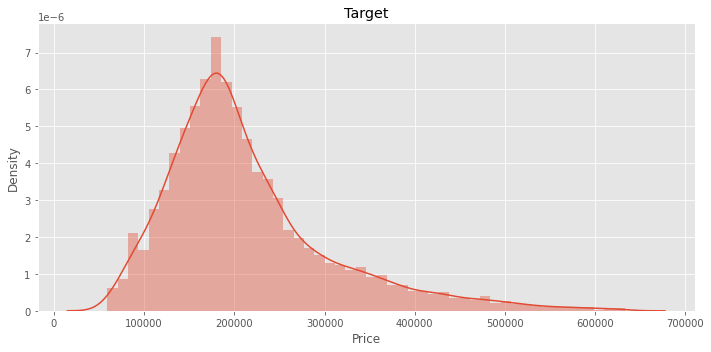

In [1104]:
plt.figure(figsize=(10,5))
sns.distplot(train_df.Price, bins=50)
plt.title('Target')
plt.tight_layout()

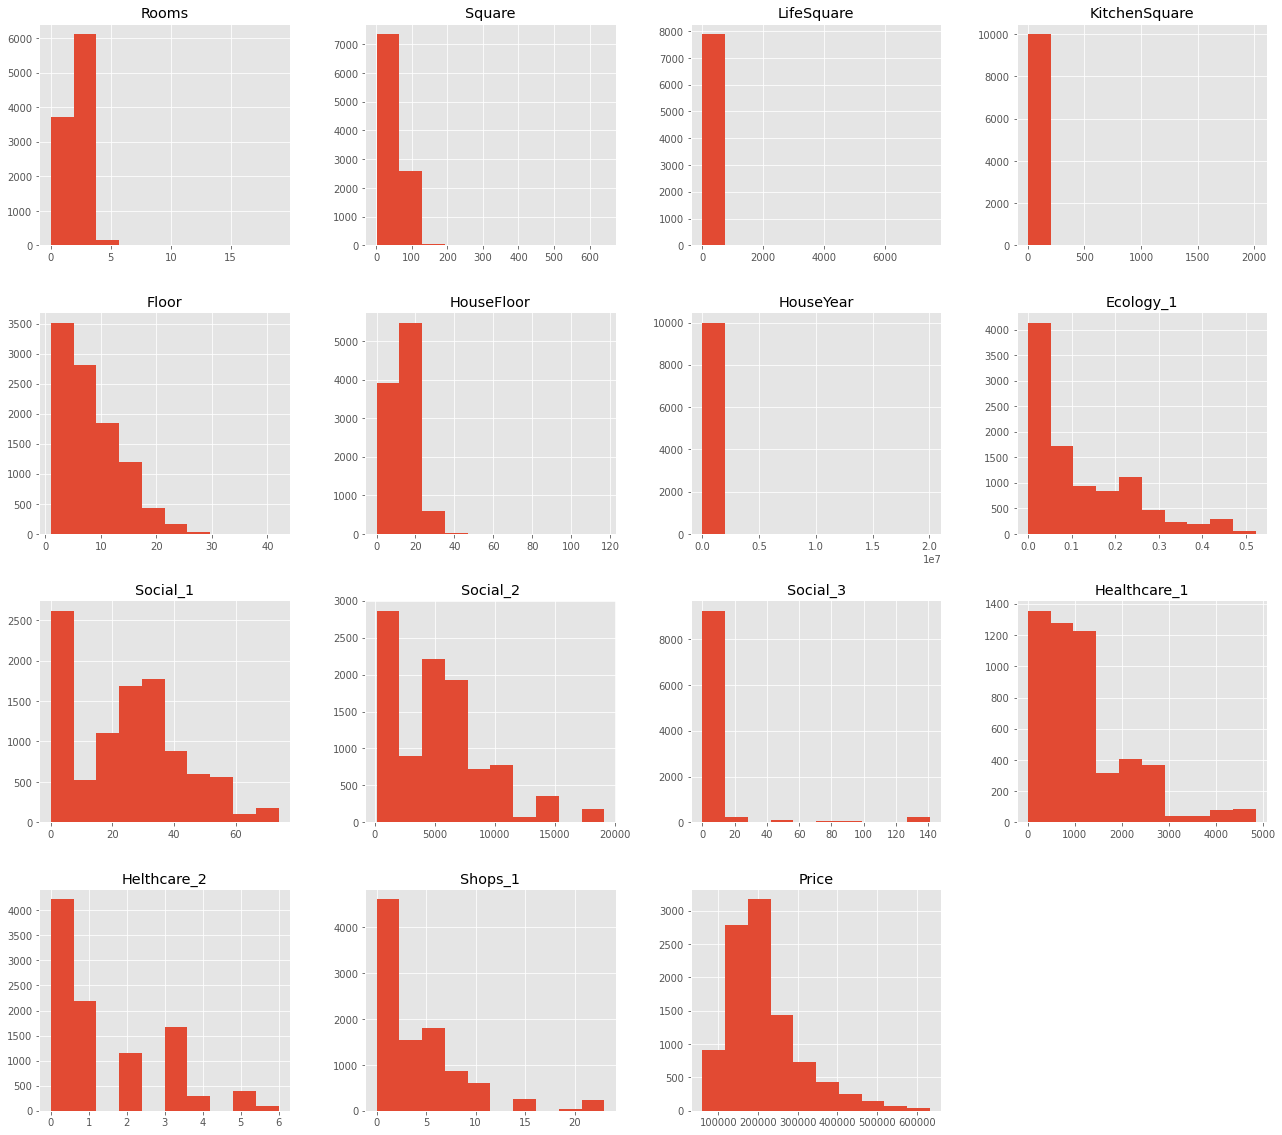

In [1105]:
hist_overview = train_df.hist(figsize=(22,20))

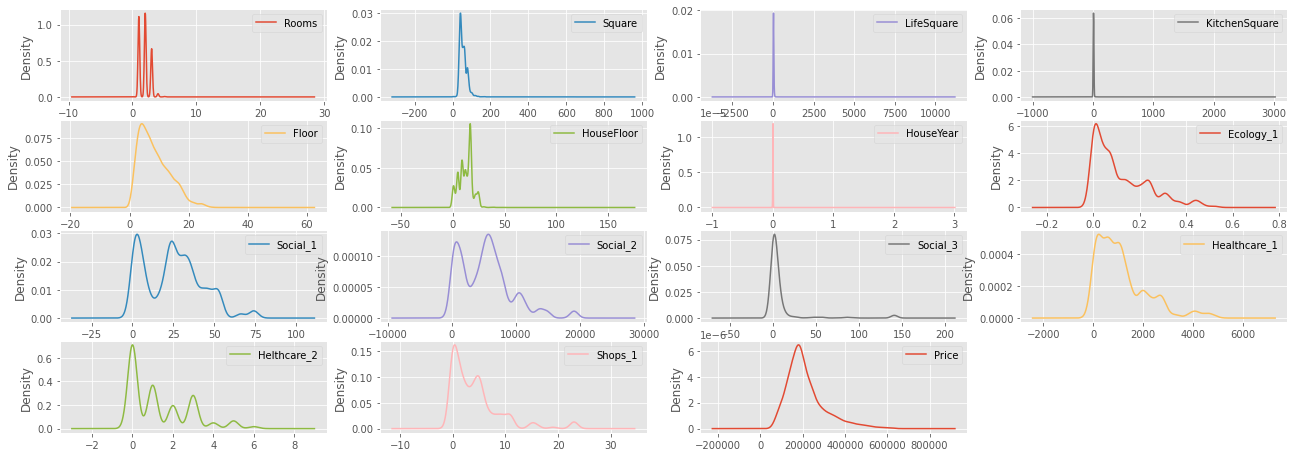

In [1106]:
den_overview = train_df.plot(kind='density', subplots=True, layout=(10, 4), sharex=False, figsize=(22,20))

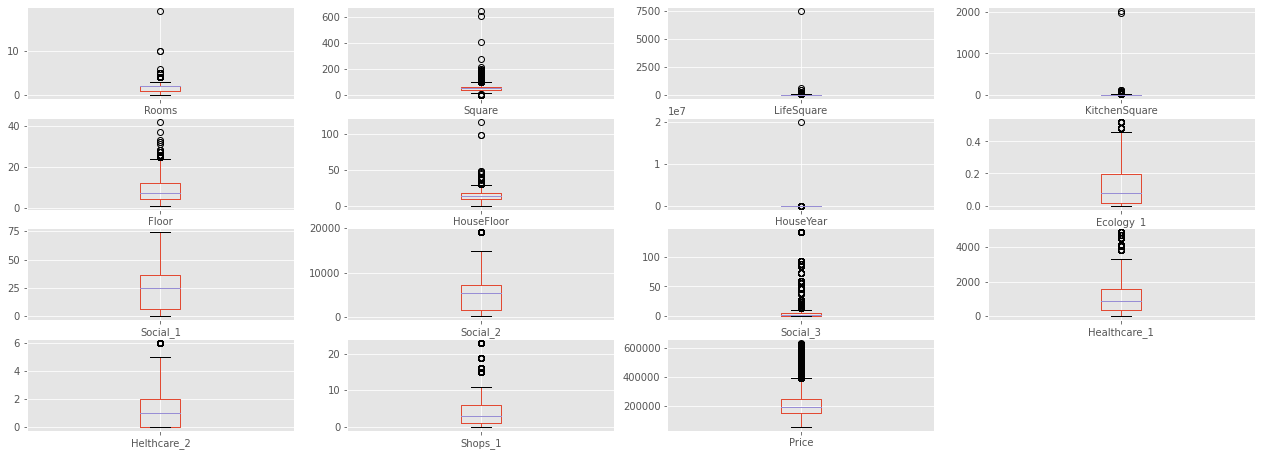

In [1107]:
box_overview = train_df.plot(kind='box', subplots=True, layout=(10,4), sharex=False, sharey=False, figsize=(22,20))

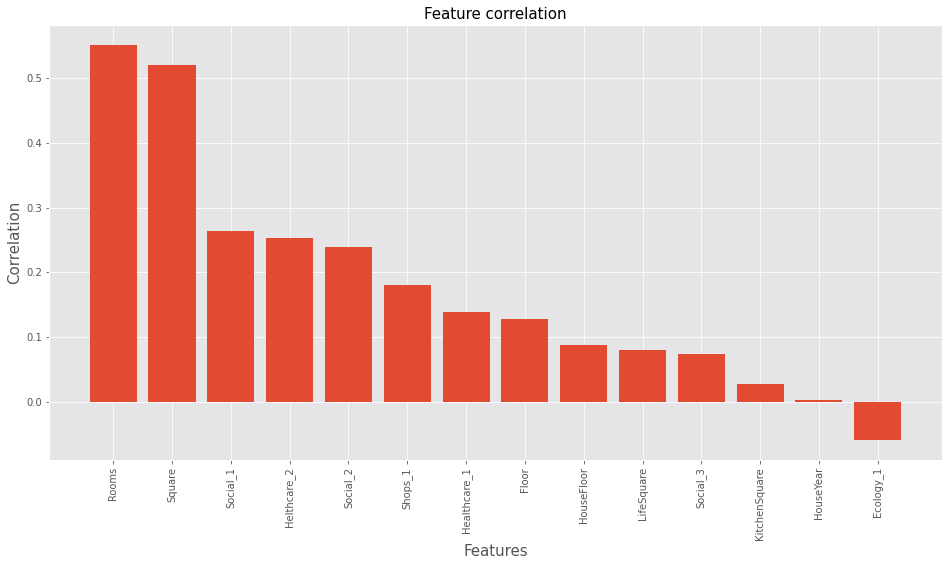

In [1108]:
correlation = train_df.corrwith(train_df['Price']).sort_values(ascending=False)
correlation.drop('Price', inplace=True)

plt.figure(figsize = (16, 8))
plt.bar(correlation.index, correlation)
plt.xticks(rotation='90')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Correlation', fontsize=15)
plt.title('Feature correlation', fontsize=15)
plt.show()

In [1109]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000,10000.000,7887.000,10000.000,10000.000,10000.000,1.000e+04,10000.000,10000.000,10000.000,10000.000,5202.000,10000.000,10000.000,10000.000
mean,1.891,56.316,37.200,6.273,8.527,12.609,3.990e+03,0.119,24.687,5352.157,8.039,1142.904,1.319,4.231,214138.857
std,0.840,21.059,86.241,28.561,5.241,6.776,2.005e+05,0.119,17.533,4006.800,23.832,1021.517,1.494,4.806,92872.294
min,0.000,1.137,0.371,0.000,1.000,0.000,1.910e+03,0.000,0.000,168.000,0.000,0.000,0.000,0.000,59174.778
25%,1.000,41.775,22.770,1.000,4.000,9.000,1.974e+03,0.018,6.000,1564.000,0.000,350.000,0.000,1.000,153872.634
50%,2.000,52.513,32.781,6.000,7.000,13.000,1.977e+03,0.075,25.000,5285.000,2.000,900.000,1.000,3.000,192269.645
75%,2.000,65.901,45.129,9.000,12.000,17.000,2.001e+03,0.196,36.000,7227.000,5.000,1548.000,2.000,6.000,249135.462
max,19.000,641.065,7480.592,2014.000,42.000,117.000,2.005e+07,0.522,74.000,19083.000,141.000,4849.000,6.000,23.000,633233.467


<AxesSubplot:title={'center':'Features with missing values'}>

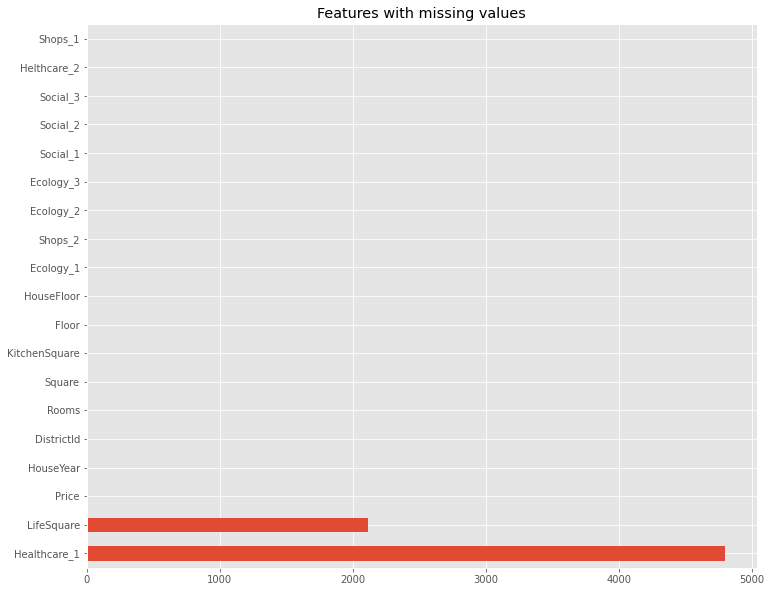

In [1110]:
#Missingness
plt.figure(figsize=(12,10))
d=train_df.isnull().sum().sort_values(ascending=False)
plt.title('Features with missing values')
d[0:19].plot.barh()

In [1111]:
class DataPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self,
                 square_quantile:tuple = (0.02,0.98),
                 life_square_quantile:tuple= (0.02,0.98),
                 kitchen_quantile:tuple= (0.02,0.98),
                 MaxRoom = 5,
                 
                 
                ):
        
        self.square_quantile = square_quantile
        self.kitchen_quantile = kitchen_quantile
        self.life_square_quantile = life_square_quantile
        self.MaxRoom = MaxRoom
        
        self.medians = None
        
        self.square_max_value = None
        self.square_min_value = None
        
        self.life_square_max_value = None
        self.life_square_min_value = None
        
        self.kitchen_square_max_value = None
        self.kitchen_square_min_value = None
        
        self.minLifeSquare = None
        self.minKitchenSquare = None
        self.HouseFloor_med = None
        
        
       


        
    def fit(self, X, y=None, **fit_params):
        
        #Сохраняем медианы
        self.medians = X.median() # medians
        
        #Определяем минимальное и максимальное значение площади квартиры
        self.square_min_value = np.quantile(X.loc[X['Square'].notnull(),'Square'], 
                                            q=self.square_quantile[0])
        self.square_max_value = np.quantile(X.loc[X['Square'].notnull(),'Square'], 
                                            q=self.square_quantile[1]) 
        
        #Определяем минимальное и максимальное значение жилой площади квартиры
        self.life_square_min_value = np.quantile(X.loc[X['LifeSquare'].notnull(),'LifeSquare'],  
                                                 q=self.life_square_quantile[0]) 
        self.life_square_max_value = np.quantile(X.loc[X['LifeSquare'].notnull(),'LifeSquare'],  
                                                 q=self.life_square_quantile[1]) 
        
        #Определяем минимальное и максимальное значение  площади кухни
        self.kitchen_square_min_value = 3 
        self.kitchen_square_max_value = np.quantile(X.loc[X['KitchenSquare'].notnull(),'KitchenSquare'],  
                                                    q=self.kitchen_quantile[1]) 
        
       
        
        return X   


    def transform(self, X, y=None):
        #Количество комнат должно быть 1 до self.MaxRoom (по умалчанию 6)
        X[X.Rooms>5] = 5
        X[X.Rooms==0] = 1
        
        #Обработка выбросов для 'Square' LifeSquare', 'KitchenSquare'

        #'Square'
        X.loc[X['Square'] <   self.square_min_value, 'Square'] =   self.square_min_value
        X.loc[X['Square'] >   self.square_max_value, 'Square'] =   self.square_max_value

        #'LifeSquare'
        X.loc[X['LifeSquare'] <   self.life_square_min_value, 'LifeSquare'] =   self.life_square_min_value
        X.loc[X['LifeSquare'] >   self.life_square_max_value, 'LifeSquare'] =   self.life_square_max_value

        #'KitchenSquare'
        X.loc[X['KitchenSquare'] <   self.kitchen_square_min_value, 'KitchenSquare'] =   self.kitchen_square_min_value
        X.loc[X['KitchenSquare'] >   self.kitchen_square_max_value, 'KitchenSquare'] =   self.kitchen_square_max_value
        
        #Обработка выбросов для 'HouseYear'
        X.loc[X['HouseYear'] > 2020, 'HouseYear'] = 2020
        X.loc[X['HouseYear'] < 1700, 'HouseYear'] =  self.medians['HouseYear']  
        
        #Обработка выбросов для 'HouseFloor'
        X.loc[X['HouseFloor'] == 0, 'HouseFloor'] =  self.medians['HouseFloor']  
        X.loc[X['HouseFloor'] >80, 'HouseFloor'] = 80  
        
        
        #Обработка выбросов для 'Floor'
        floor_outliers = X[X['Floor'] > X['HouseFloor']].index

        np.random.seed(27)
        X.loc[floor_outliers, 'Floor'] = X.loc[floor_outliers, 'HouseFloor'].apply(
        lambda x: random.randint(1, x))
        
        
        #Обработка выбросов для 'Healthcare_1'
        X.loc[X['Healthcare_1'].isnull(), 'Healthcare_1'] = medians['Healthcare_1']
        
        medianSquarePerRooms=X.groupby(['Rooms'])['Square'].agg('median')- \
        X.groupby(['Rooms'])['LifeSquare'].agg('median')- \
        X.groupby(['Rooms'])['KitchenSquare'].agg('median')
        
        LifeSquare_isnull_1 = (X['LifeSquare'].isnull())&(X['Rooms']==1)
        LifeSquare_isnull_2 = (X['LifeSquare'].isnull())&(X['Rooms']==2)
        LifeSquare_isnull_3 = (X['LifeSquare'].isnull())&(X['Rooms']==3)
        LifeSquare_isnull_4 = (X['LifeSquare'].isnull())&(X['Rooms']==4)
        LifeSquare_isnull_5 = (X['LifeSquare'].isnull())&(X['Rooms']==5)
        
        X.loc[LifeSquare_isnull_1, 'LifeSquare'] = X.loc[LifeSquare_isnull_1,'Square']-\
        X.loc[LifeSquare_isnull_1,'KitchenSquare']-medianSquarePerRooms.array[0]

        X.loc[LifeSquare_isnull_2, 'LifeSquare'] = X.loc[LifeSquare_isnull_2,'Square']-\
        X.loc[LifeSquare_isnull_2,'KitchenSquare']-medianSquarePerRooms.array[1]

        X.loc[LifeSquare_isnull_3, 'LifeSquare'] = X.loc[LifeSquare_isnull_3,'Square']-\
        X.loc[LifeSquare_isnull_3,'KitchenSquare']-medianSquarePerRooms.array[2]

        X.loc[LifeSquare_isnull_4, 'LifeSquare'] = X.loc[LifeSquare_isnull_4,'Square']-\
        X.loc[LifeSquare_isnull_4,'KitchenSquare']-medianSquarePerRooms.array[3]

        X.loc[LifeSquare_isnull_5, 'LifeSquare'] = X.loc[LifeSquare_isnull_5,'Square']-\
        X.loc[LifeSquare_isnull_5,'KitchenSquare']-medianSquarePerRooms.array[4]
     
       
        
        

        X.fillna(self.medians, inplace=True)
        
        return X
    
    def fit_transform(self,X, y=None, **fit_params):
        
            

        return self.transform(self.fit(X))

In [1112]:
class FeatureGenerator:
    
    def __init__(self):
        self.median_district_year = None
        self.districts_density = None
        self.district_price_per_square = None
        
    
    def fit(self,X, y=None, **fit_params):
       
        
        self.districts_median_year = None
        self.districts_density = None
        self.district_price_per_square = None
        self.min_sq = None
        self.max_sq = None
        
        self.min_sq = np.quantile(X['Square'], q=0.005)
        self.max_sq = np.quantile(X['Square'], q=0.995)
        
        self.districts_median_year = X.groupby(['DistrictId'])['HouseYear'].agg('median').to_dict()  
        
        self.districts_density = X.groupby(['DistrictId'])['Square'].agg('median').to_dict()  
        
        self.district_price_per_square = X.groupby(['DistrictId'])['Price'].agg('median') \
        / X.groupby(['DistrictId'])['Square'].agg('median')  
        
        
       
        
    
        return X
      
    
    def transform(self,X):
        
        
        #X['Ecology_2_bin'] = X['Ecology_2'].replace({'A':0, 'B':1})
        #X['Ecology_3_bin'] = X['Ecology_3'].replace({'A':0, 'B':1})
        #X['Shops_2_bin'] = X['Shops_2'].replace({'A':0, 'B':1})
        
    
        X.drop(['Ecology_2','Ecology_3','Shops_2'], axis=1, inplace=True)
        
        X['DistrictYear'] = X['DistrictId'].map(self.districts_median_year)
        
        self.median_district_year = X['DistrictYear'].median()
        X['DistrictYear'].fillna(self.median_district_year, inplace=True)
        
        X['DistrictDensity'] = X['DistrictId'].map(self.districts_density)
        
        self.median_district_density = X['DistrictDensity'].median()
        X['DistrictDensity'].fillna(self.median_district_density, inplace=True)
        
        self.district_price_per_square.to_dict()
        X['DistrictPrice'] = X['DistrictId'].map(self.district_price_per_square)
        
        self.median_district_price_per_square = X['DistrictPrice'].median()
        X['DistrictPrice'].fillna(self.median_district_price_per_square, inplace=True)
        
            
        
        return X
    
    def fit_transform(self,X, y=None, **fit_params):
            

        return self.transform(self.fit(X))
    
    
        
        return X
        

In [1113]:
gradBoostingRegr = GradientBoostingRegressor(criterion='mse',
                                     max_depth=7,
                                     min_samples_leaf=100,
                                     random_state=42,  
                                     n_estimators=2500, 
                                     max_features='sqrt', 
                                     loss='huber', 
                                     learning_rate=0.015)

In [1114]:
data_prep = DataPreprocessor()
featureGenerator = FeatureGenerator()


train_df = data_prep.fit_transform(train_df)
test_df =data_prep.transform(test_df)

train_df = featureGenerator.fit_transform(train_df)
test_df = featureGenerator.transform(test_df)

y = pd.DataFrame(data=train_df['Price'])
train_df.drop('Price', axis=1, inplace=True)

X_train, X_valid, y_train, y_valid = train_test_split(train_df, y, test_size=0.3, random_state=100)



In [1115]:
X_train.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,DistrictYear,DistrictDensity,DistrictPrice
count,7000.000,7000.000,7000.000,7000.000,7000.000,7000.000,7000.000,7000.000,7000.000,7000.000,7000.000,7000.000,7000.000,7000.000,7000.000,7000.000,7000.000
mean,1.881,55.663,36.351,6.346,7.434,12.977,1984.889,0.121,24.601,5334.017,8.046,1027.451,1.330,4.220,1978.157,53.181,3815.596
std,0.811,17.426,15.943,2.938,5.072,6.312,18.492,0.146,17.543,4006.138,23.671,748.767,1.506,4.801,9.213,6.123,992.690
min,1.000,31.538,4.885,3.000,1.000,1.000,1910.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1924.500,31.538,0.032
25%,1.000,41.579,23.686,3.000,3.000,9.000,1974.000,0.020,6.000,1564.000,0.000,830.000,0.000,1.000,1974.000,47.652,2955.306
50%,2.000,52.182,33.238,6.000,6.000,13.000,1977.000,0.075,25.000,5285.000,2.000,900.000,1.000,3.000,1977.000,53.949,3975.517
75%,2.000,65.815,45.590,9.000,11.000,17.000,2001.000,0.196,35.000,7227.000,5.000,990.000,2.000,6.000,1980.000,56.691,4422.597
max,5.000,103.622,87.889,13.000,37.000,80.000,2020.000,5.000,74.000,19083.000,141.000,4849.000,6.000,23.000,2011.000,85.591,8361.391


In [1116]:
gradBoostingRegr.fit(X_train,y_train)


GradientBoostingRegressor(criterion='mse', learning_rate=0.015, loss='huber',
                          max_depth=7, max_features='sqrt',
                          min_samples_leaf=100, n_estimators=2500,
                          random_state=42)

Train R2:	0.843
Valid R2:	0.752


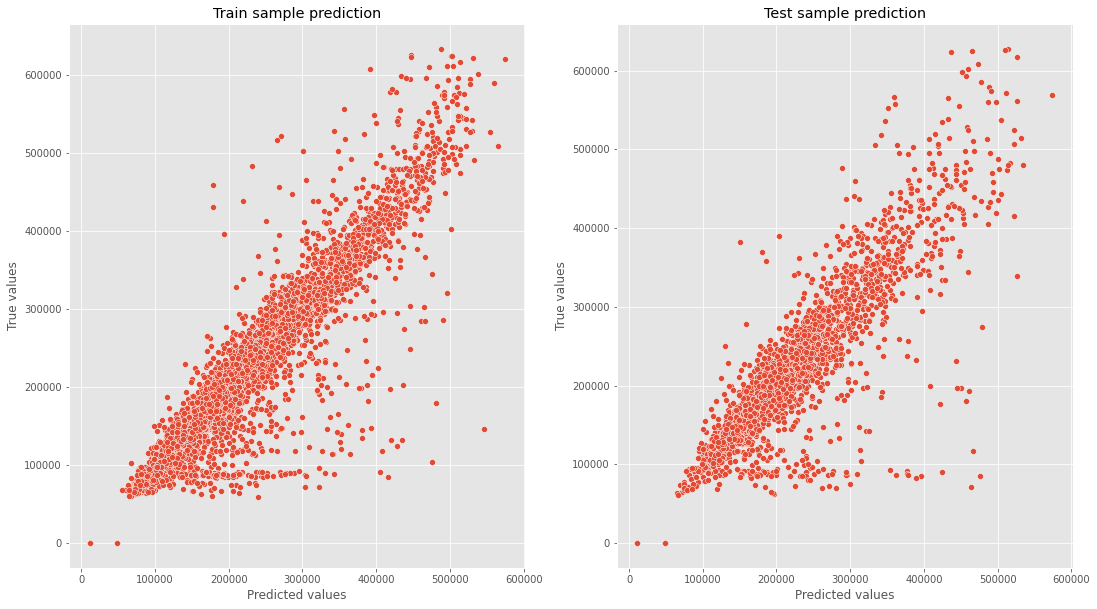

In [1117]:
y_train_preds = gradBoostingRegr.predict(X_train)
y_valid_preds = gradBoostingRegr.predict(X_valid)

evaluate_preds(y_train.to_numpy().reshape(-1),y_train_preds,y_valid.to_numpy().reshape(-1),y_valid_preds)

In [1118]:
y_train.to_numpy().reshape(-1)

array([107583.46341865, 175299.73979435, 404855.26321383, ...,
       169089.59266442, 334583.1729326 , 431812.74278489])

In [1119]:
y_train_preds.shape

(7000,)

In [1120]:
test_df.dtypes

Id                   int64
DistrictId           int64
Rooms              float64
Square             float64
LifeSquare         float64
KitchenSquare      float64
Floor                int64
HouseFloor         float64
HouseYear          float64
Ecology_1          float64
Social_1             int64
Social_2             int64
Social_3             int64
Healthcare_1       float64
Helthcare_2          int64
Shops_1              int64
DistrictYear       float64
DistrictDensity    float64
DistrictPrice      float64
dtype: object

In [1121]:
test_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,DistrictYear,DistrictDensity,DistrictPrice
count,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.0,5.000e+03,5000.000
mean,8406.527,51.233,1.908,56.120,36.689,6.364,7.494,12.934,1984.375,0.123,24.917,5401.662,8.264,1027.983,1.322,4.244,1977.0,3.154e+01,0.032
std,4837.825,44.193,0.810,17.420,15.812,2.906,5.142,6.424,18.563,0.170,17.535,4026.776,23.864,766.601,1.482,4.777,0.0,4.011e-12,0.008
min,1.000,0.000,1.000,31.538,4.885,3.000,1.000,1.000,1908.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1977.0,3.154e+01,0.032
25%,4219.000,20.000,1.000,41.883,24.032,3.000,4.000,9.000,1973.000,0.020,6.000,1564.000,0.000,810.000,0.000,1.000,1977.0,3.154e+01,0.032
50%,8318.500,37.000,2.000,52.859,33.736,6.000,6.000,13.000,1977.000,0.074,25.000,5285.000,2.000,900.000,1.000,3.000,1977.0,3.154e+01,0.032
75%,12598.250,77.000,2.000,66.268,45.898,9.000,11.000,17.000,2000.000,0.196,36.000,7287.000,5.000,990.000,2.000,6.000,1977.0,3.154e+01,0.032
max,16795.000,212.000,5.000,103.622,88.297,13.000,46.000,80.000,2020.000,5.000,74.000,19083.000,141.000,4849.000,6.000,23.000,1977.0,3.154e+01,0.159


In [1122]:
test_id = test_df["Id"]
pred_df = pd.DataFrame()
pred_df["Id"] = test_id
pred_df["Price"] = gradBoostingRegr.predict(test_df) 
assert pred_df.shape[0] == 5000, f"Real pred-shape = {pred_df.shape[0]}, Expected pred-shape = 5000"

pred_df.to_csv("./zapevalin_predictions.csv", index=False)